In [1]:
#pwd()
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cd ./2023-04-19 Cypress 101 data

/Users/sainikhil/Downloads/RADISH/2023-04-19 Cypress 101 data


In [5]:
ls

101 Cypress EventReport_20230419_1054.csv
101 Cypress EventReport_20230419_1054.xls
101 Cypress EventReport_20230419_1054.xlsx
101 Cypress EventReport_20230419_1858.csv
101 Cypress EventReport_20230419_1858.xls
101 Cypress EventReport_20230419_1858.xlsx
101_Cypress_EventReport_1054.csv
101_Cypress_EventReport_1858.csv
Cypress 101 - Demand 21.xls
Cypress 101 - Passage 23.xls
Cypress 101 - Queue 31.xls
MVDS 15 min/
MVDS 15 min.zip
MVDS Detectors 101 Cypress.png
MVDS raw data/
MVDS raw data.zip
Ramp Metering Information.ipynb


In [6]:
cd ./MVDS raw data

/Users/sainikhil/Downloads/RADISH/2023-04-19 Cypress 101 data/MVDS raw data


In [7]:
ls

Inventory.csv                    Lane_Readings_15445-1-45826.csv
Lane_Readings_15425-1-45777.csv  Lane_Readings_15446-1-45827.csv
Lane_Readings_15425-2-45778.csv  Lane_Readings_15446-2-45828.csv
Lane_Readings_15426-1-45779.csv  Lane_Readings_15446-3-45829.csv
Lane_Readings_15426-2-45780.csv  Lane_Readings_15447-1-45830.csv
Lane_Readings_15426-3-45781.csv  Lane_Readings_15447-2-45831.csv
Lane_Readings_15427-1-45782.csv  Lane_Readings_15572-1-46142.csv
Lane_Readings_15439-1-45813.csv  Lane_Readings_15572-2-46143.csv
Lane_Readings_15440-1-45814.csv  Lane_Readings_15572-3-46144.csv
Lane_Readings_15440-2-45815.csv  Lane_Readings_15572-4-46145.csv
Lane_Readings_15440-3-45816.csv  Lane_Readings_15573-1-46146.csv
Lane_Readings_15440-4-45817.csv  Lane_Readings_15573-2-46147.csv
Lane_Readings_15441-1-45818.csv  Zone_Readings.csv
Lane_Readings_15441-2-45819.csv


In [ ]:
#Questions
#What is quality column?
#The MVDS detector situated upstream: Is it detecting traffic remaining on freeway after some traffic exits the freeway?
#Three and four general-purpose how to differentiate?
#Downstream means how far from merge area?
#Look at speeds 

In [47]:
#15445 15446 are the MVDS detectors closest to the merge area
#Volume is in number of vehicles
#Raw data is basically aggregate over 20 seconds
#MVDS data is divided by lanes and zones (a group of lanes)
#Occupancy expressed as percentage
df = pd.read_csv('Lane_Readings_15446-3-45829.csv')

In [48]:
df

,zone_id,lane_number,lane_id,measurement_start,speed,volume,occupancy,quality
0,15446,3,45829,2023-04-19T00:00:01-04:00,81.0,2,1,1
1,15446,3,45829,2023-04-19T00:00:21-04:00,78.0,3,5,0
2,15446,3,45829,2023-04-19T00:00:41-04:00,84.0,3,2,1
3,15446,3,45829,2023-04-19T00:01:01-04:00,70.0,3,6,0
4,15446,3,45829,2023-04-19T00:01:21-04:00,74.0,6,10,0
...,...,...,...,...,...,...,...,...
4310,15446,3,45829,2023-04-19T23:57:33-04:00,74.0,1,1,0
4311,15446,3,45829,2023-04-19T23:57:53-04:00,86.0,4,4,1
4312,15446,3,45829,2023-04-19T23:58:13-04:00,73.0,2,2,0
4313,15446,3,45829,2023-04-19T23:58:33-04:00,78.0,3,2,0


In [16]:
df.dtypes

zone_id                int64
lane_number            int64
lane_id                int64
measurement_start     object
speed                float64
volume                 int64
occupancy              int64
quality                int64
dtype: object

In [55]:
df['measurement_start_timestamp'] = df['measurement_start'].apply(lambda x:str(x.split('T')[0]) + str(' ')+str(x.split('T')[1].split('-')[0]))
df = df.dropna(subset=['speed', 'volume', 'occupancy'])
df = df[(df['speed']>=0) & (df['volume']>=0) & (df['occupancy']>=0)]
df['measurement_start_timestamp'] = pd.to_datetime(df['measurement_start_timestamp'])
df

,zone_id,lane_number,lane_id,measurement_start,speed,volume,occupancy,quality,measurement_start_timestamp
0,15446,3,45829,2023-04-19T00:00:01-04:00,81.0,2,1,1,2023-04-19 00:00:01
1,15446,3,45829,2023-04-19T00:00:21-04:00,78.0,3,5,0,2023-04-19 00:00:21
2,15446,3,45829,2023-04-19T00:00:41-04:00,84.0,3,2,1,2023-04-19 00:00:41
3,15446,3,45829,2023-04-19T00:01:01-04:00,70.0,3,6,0,2023-04-19 00:01:01
4,15446,3,45829,2023-04-19T00:01:21-04:00,74.0,6,10,0,2023-04-19 00:01:21
...,...,...,...,...,...,...,...,...,...
4310,15446,3,45829,2023-04-19T23:57:33-04:00,74.0,1,1,0,2023-04-19 23:57:33
4311,15446,3,45829,2023-04-19T23:57:53-04:00,86.0,4,4,1,2023-04-19 23:57:53
4312,15446,3,45829,2023-04-19T23:58:13-04:00,73.0,2,2,0,2023-04-19 23:58:13
4313,15446,3,45829,2023-04-19T23:58:33-04:00,78.0,3,2,0,2023-04-19 23:58:33


In [64]:
df_average_speed = pd.DataFrame({'Average Speed':df.groupby(pd.Grouper(key='measurement_start_timestamp',freq='5min')).speed.mean()}).reset_index()


df_average_flow = pd.DataFrame({'Average Flow':df.groupby(pd.Grouper(key='measurement_start_timestamp',freq='5min')).volume.sum()}).reset_index()


df_average_occupancy = pd.DataFrame({'Average Occupancy':df.groupby(pd.Grouper(key='measurement_start_timestamp',freq='5min')).occupancy.mean()}).reset_index()
df_aggregate = pd.merge(df_average_speed, df_average_flow, on='measurement_start_timestamp',how='left')
df_aggregate = pd.merge(df_aggregate, df_average_occupancy, on='measurement_start_timestamp',how='left')
df_aggregate['Average Flow Rate'] = df_aggregate['Average Flow'].apply(lambda x:(x*60)/5)
df_aggregate

,measurement_start_timestamp,Average Speed,Average Flow,Average Occupancy,Average Flow Rate
0,2023-04-19 00:00:00,78.200000,50,3.600000,600.0
1,2023-04-19 00:05:00,79.266667,39,2.266667,468.0
2,2023-04-19 00:10:00,78.666667,39,3.166667,468.0
3,2023-04-19 00:15:00,77.071429,34,2.285714,408.0
4,2023-04-19 00:20:00,77.250000,16,1.750000,192.0
...,...,...,...,...,...
283,2023-04-19 23:35:00,83.214286,42,2.857143,504.0
284,2023-04-19 23:40:00,81.600000,37,2.000000,444.0
285,2023-04-19 23:45:00,80.500000,47,3.142857,564.0
286,2023-04-19 23:50:00,78.250000,48,4.083333,576.0


In [2]:
def aggregate_function(zone, lane, filenumber, t):
    df = pd.read_csv('Lane_Readings_{}-{}-{}.csv'.format(zone, lane, filenumber))
    df['measurement_start_timestamp'] = df['measurement_start'].apply(lambda x:str(x.split('T')[0]) + str(' ')+str(x.split('T')[1].split('-')[0]))
    df = df.dropna(subset=['speed', 'volume', 'occupancy'])
    df = df[(df['speed']>=0) & (df['volume']>=0) & (df['occupancy']>=0)]
    df['measurement_start_timestamp'] = pd.to_datetime(df['measurement_start_timestamp'])
    df_average_speed = pd.DataFrame({'Average Speed':df.groupby(pd.Grouper(key='measurement_start_timestamp',freq='{}min'.format(t))).speed.mean()}).reset_index()
    df_average_flow = pd.DataFrame({'Average Flow':df.groupby(pd.Grouper(key='measurement_start_timestamp',freq='{}min'.format(t))).volume.sum()}).reset_index()
    df_average_occupancy = pd.DataFrame({'Average Occupancy':df.groupby(pd.Grouper(key='measurement_start_timestamp',freq='{}min'.format(t))).occupancy.mean()}).reset_index()
    df_aggregate = pd.merge(df_average_speed, df_average_flow, on='measurement_start_timestamp',how='left')
    df_aggregate = pd.merge(df_aggregate, df_average_occupancy, on='measurement_start_timestamp',how='left')
    df_aggregate['Average Flow Rate'] = df_aggregate['Average Flow'].apply(lambda x:(x*60)/t)
    return df_aggregate

In [7]:
#Lane 3 Upstream vs Downstream vs Merge region ::: Observed Clear correlation
#One of express lane Upstream vs Downstream vs Merge region
#Do the aggregation for 15 minute intervals
#15446 Lane 3 15 minute vs Event detail raw Mainline flow rate 15 minute aggregate for the specific period during which event detail data is available ::: Observed Clear correlation


# Lane 3 and 4 Upstream vs Downstream vs Merge region

In [8]:
df_near_merge = aggregate_function(15446, 3, 45829, 15)
df_upstream = aggregate_function(15440, 4, 45817, 15)
df_downstream = aggregate_function(15572, 4, 46145, 15)

In [9]:
df_near_merge

,measurement_start_timestamp,Average Speed,Average Flow,Average Occupancy,Average Flow Rate
0,2023-04-19 00:00:00,78.714286,128,3.000000,512.0
1,2023-04-19 00:15:00,77.571429,84,2.171429,336.0
2,2023-04-19 00:30:00,79.277778,82,2.222222,328.0
3,2023-04-19 00:45:00,83.138889,71,1.916667,284.0
4,2023-04-19 01:00:00,76.771429,76,1.971429,304.0
...,...,...,...,...,...
91,2023-04-19 22:45:00,77.155556,216,4.977778,864.0
92,2023-04-19 23:00:00,77.227273,171,3.931818,684.0
93,2023-04-19 23:15:00,77.800000,129,3.000000,516.0
94,2023-04-19 23:30:00,81.674419,118,2.395349,472.0


In [10]:
df_upstream

,measurement_start_timestamp,Average Speed,Average Flow,Average Occupancy,Average Flow Rate
0,2023-04-19 00:00:00,79.642857,107,2.166667,428.0
1,2023-04-19 00:15:00,78.600000,67,1.542857,268.0
2,2023-04-19 00:30:00,79.756757,76,1.594595,304.0
3,2023-04-19 00:45:00,81.878788,69,1.787879,276.0
4,2023-04-19 01:00:00,77.181818,69,1.696970,276.0
...,...,...,...,...,...
91,2023-04-19 22:45:00,77.977273,198,4.181818,792.0
92,2023-04-19 23:00:00,77.931818,158,3.318182,632.0
93,2023-04-19 23:15:00,78.682927,115,2.292683,460.0
94,2023-04-19 23:30:00,81.707317,101,1.829268,404.0


In [11]:
df_downstream

,measurement_start_timestamp,Average Speed,Average Flow,Average Occupancy,Average Flow Rate
0,2023-04-19 00:00:00,77.116279,119,2.511628,476.0
1,2023-04-19 00:15:00,76.428571,79,1.914286,316.0
2,2023-04-19 00:30:00,77.947368,88,1.973684,352.0
3,2023-04-19 00:45:00,79.277778,71,1.694444,284.0
4,2023-04-19 01:00:00,75.714286,80,1.885714,320.0
...,...,...,...,...,...
91,2023-04-19 22:45:00,75.800000,207,4.422222,828.0
92,2023-04-19 23:00:00,75.954545,171,3.681818,684.0
93,2023-04-19 23:15:00,75.954545,123,2.522727,492.0
94,2023-04-19 23:30:00,79.025000,114,2.325000,456.0


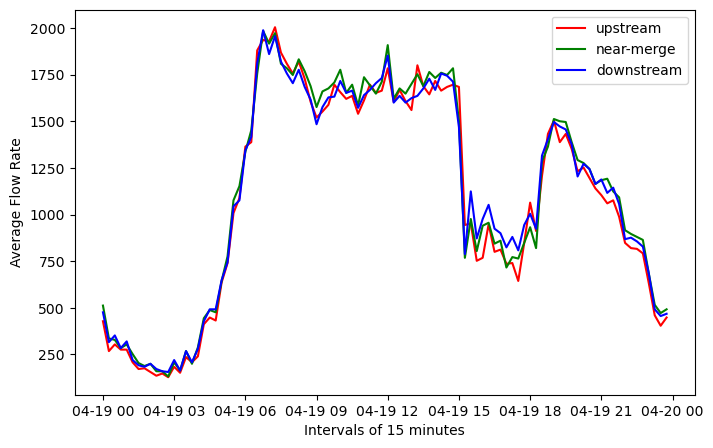

In [13]:
fig = plt.figure(figsize=(8,5))
plt.plot(df_upstream['measurement_start_timestamp'],df_upstream['Average Flow Rate'],color='red')
plt.plot(df_near_merge['measurement_start_timestamp'],df_near_merge['Average Flow Rate'],color='green')
plt.plot(df_downstream['measurement_start_timestamp'],df_downstream['Average Flow Rate'],color='blue')
plt.xlabel('Intervals of 15 minutes')
plt.ylabel('Average Flow Rate')
plt.legend(['upstream','near-merge','downstream'])

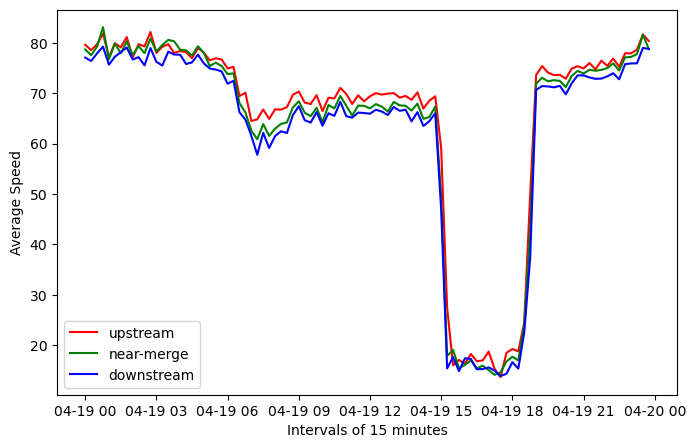

In [14]:
fig = plt.figure(figsize=(8,5))
plt.plot(df_upstream['measurement_start_timestamp'],df_upstream['Average Speed'],color='red')
plt.plot(df_near_merge['measurement_start_timestamp'],df_near_merge['Average Speed'],color='green')
plt.plot(df_downstream['measurement_start_timestamp'],df_downstream['Average Speed'],color='blue')
plt.xlabel('Intervals of 15 minutes')
plt.ylabel('Average Speed')
plt.legend(['upstream','near-merge','downstream'])

In [ ]:
#No clear difference between upstream downstream. Is it because I used Lane 3 and Lane 4 in this analysis?

# Lane 1 Upstream vs Downstream vs Merge region

In [9]:
df_near_merge = aggregate_function(15446, 3, 45829, 15)
#df_upstream = aggregate_function(15441, 3, 45818, 15)
#df_downstream = aggregate_function(15425, 3, 45777, 15)

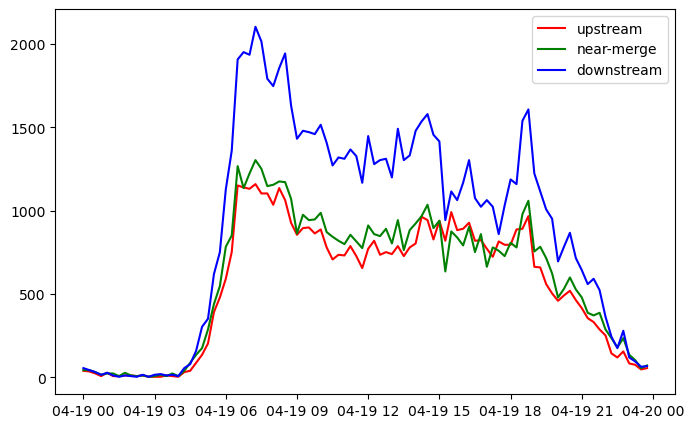

In [16]:
fig = plt.figure(figsize=(8,5))
plt.plot(df_upstream['measurement_start_timestamp'],df_upstream['Average Flow Rate'],color='red')
plt.plot(df_near_merge['measurement_start_timestamp'],df_near_merge['Average Flow Rate'],color='green')
plt.plot(df_downstream['measurement_start_timestamp'],df_downstream['Average Flow Rate'],color='blue')
plt.legend(['upstream','near-merge','downstream'])

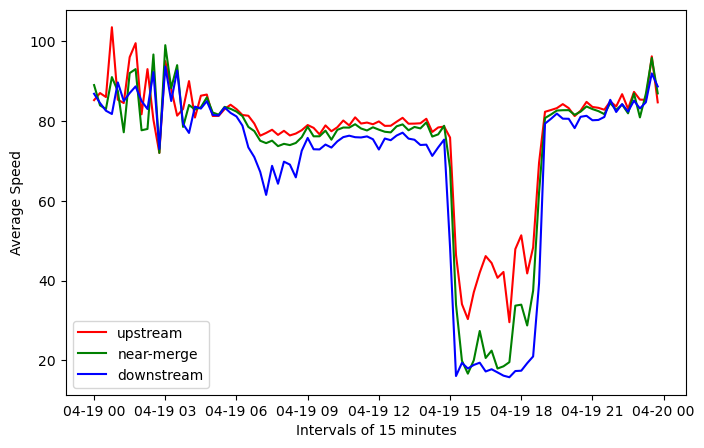

In [17]:
fig = plt.figure(figsize=(8,5))
plt.plot(df_upstream['measurement_start_timestamp'],df_upstream['Average Speed'],color='red')
plt.plot(df_near_merge['measurement_start_timestamp'],df_near_merge['Average Speed'],color='green')
plt.plot(df_downstream['measurement_start_timestamp'],df_downstream['Average Speed'],color='blue')
plt.xlabel('Intervals of 15 minutes')
plt.ylabel('Average Speed')
plt.legend(['upstream','near-merge','downstream'])

In [ ]:
3

Text(0, 0.5, 'Flow rate measured from Upstream MVDS detector')

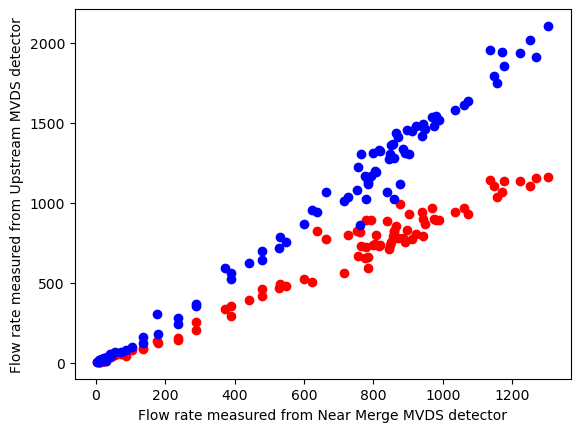

In [19]:
plt.scatter(df_near_merge['Average Flow Rate'],df_upstream['Average Flow Rate'],c='r')
plt.scatter(df_near_merge['Average Flow Rate'],df_downstream['Average Flow Rate'],c='b')
#plt.xlabel('Flow rate measured from Upstream MVDS detector')
plt.xlabel('Flow rate measured from Near Merge MVDS detector')
plt.ylabel('Flow rate measured from Upstream MVDS detector')

Text(0, 0.5, 'Flow rate measured from Downstream MVDS detector')

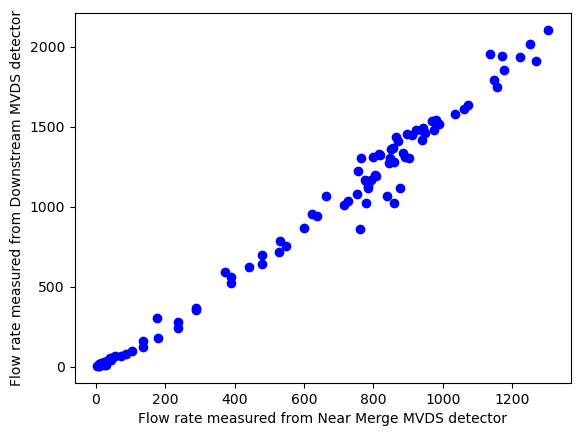

In [18]:
plt.scatter(df_near_merge['Average Flow Rate'],df_downstream['Average Flow Rate'],c='b')
#plt.xlabel('Flow rate measured from Upstream MVDS detector')
plt.xlabel('Flow rate measured from Near Merge MVDS detector')
plt.ylabel('Flow rate measured from Downstream MVDS detector')

In [ ]:
#Observation: Express Lane 1 downstream flow rate higher in rush hours

# Event Detail data

In [10]:
file_name = '/Users/sainikhil/Downloads/RADISH/2023-04-19 Cypress 101 data/101_Cypress_EventReport_1858.csv'
#xl_file = pd.ExcelFile(file_name)

#dfs = {sheet_name: xl_file.parse(sheet_name) 
         # for sheet_name in xl_file.sheet_names}
#df_event_detail = dfs['101 Cypress EventReport_2023041']
df_event_detail = pd.read_csv(file_name, engine='python')

df_event_detail = df_event_detail.drop(axis=1, columns=[' '])
dict1 = {}
for column in df_event_detail.columns:
    dict1[column] = column.strip()
df_event_detail = df_event_detail.rename(columns=dict1)

df_event_detail['Timestamp'] = df_event_detail['Timestamp'].apply(lambda x: x.strip())
df_event_detail['Category'] = df_event_detail['Category'].apply(lambda x: x.strip())
df_event_detail['Type'] = df_event_detail['Type'].apply(lambda x: x.strip())
df_event_detail['Timestamp'] = pd.to_datetime(df_event_detail['Timestamp'])
df_event_detail = df_event_detail.rename(columns={'Event Value':'Event_value'})

In [11]:
df_event_detail

,Timestamp,Category,Type,Event_value
0,2023-04-19 18:58:26.400,Detector Events,Detector Off,13
1,2023-04-19 18:58:26.300,Detector Events,Detector On,2
2,2023-04-19 18:58:25.300,Detector Events,Detector Off,3
3,2023-04-19 18:58:25.200,Detector Events,Detector On,13
4,2023-04-19 18:58:25.100,Detector Events,Detector On,3
...,...,...,...,...
99995,2023-04-19 13:09:16.900,Detector Events,Detector Off,3
99996,2023-04-19 13:09:16.900,Detector Events,Detector Off,14
99997,2023-04-19 13:09:16.700,Detector Events,Detector Off,11
99998,2023-04-19 13:09:16.600,Detector Events,Detector On,14


In [12]:
df_gr2 = pd.DataFrame({'Aggregate Mainline num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==13').groupby([pd.Grouper(key='Timestamp',freq='{}min'.format(15)),'Type']).Event_value.count()}).reset_index()
df_gr2['Aggregate Mainline flow rate'] = df_gr2['Aggregate Mainline num vehicles'].apply(lambda x: x*(60/15))

In [13]:
df_gr2

,Timestamp,Type,Aggregate Mainline num vehicles,Aggregate Mainline flow rate
0,2023-04-19 13:00:00,Detector On,153,612.0
1,2023-04-19 13:15:00,Detector On,429,1716.0
2,2023-04-19 13:30:00,Detector On,407,1628.0
3,2023-04-19 13:45:00,Detector On,414,1656.0
4,2023-04-19 14:00:00,Detector On,424,1696.0
5,2023-04-19 14:15:00,Detector On,418,1672.0
6,2023-04-19 14:30:00,Detector On,426,1704.0
7,2023-04-19 14:45:00,Detector On,433,1732.0
8,2023-04-19 15:00:00,Detector On,362,1448.0
9,2023-04-19 15:15:00,Detector On,184,736.0


In [14]:
df_near_merge

,measurement_start_timestamp,Average Speed,Average Flow,Average Occupancy,Average Flow Rate
0,2023-04-19 00:00:00,78.714286,128,3.000000,512.0
1,2023-04-19 00:15:00,77.571429,84,2.171429,336.0
2,2023-04-19 00:30:00,79.277778,82,2.222222,328.0
3,2023-04-19 00:45:00,83.138889,71,1.916667,284.0
4,2023-04-19 01:00:00,76.771429,76,1.971429,304.0
...,...,...,...,...,...
91,2023-04-19 22:45:00,77.155556,216,4.977778,864.0
92,2023-04-19 23:00:00,77.227273,171,3.931818,684.0
93,2023-04-19 23:15:00,77.800000,129,3.000000,516.0
94,2023-04-19 23:30:00,81.674419,118,2.395349,472.0


In [15]:
df_mvds_event_detail = pd.merge(df_gr2, df_near_merge, left_on = 'Timestamp', right_on = 'measurement_start_timestamp', how='left')

In [16]:
df_mvds_event_detail

,Timestamp,Type,Aggregate Mainline num vehicles,Aggregate Mainline flow rate,measurement_start_timestamp,Average Speed,Average Flow,Average Occupancy,Average Flow Rate
0,2023-04-19 13:00:00,Detector On,153,612.0,2023-04-19 13:00:00,68.295455,425,12.636364,1700.0
1,2023-04-19 13:15:00,Detector On,429,1716.0,2023-04-19 13:15:00,67.622222,438,13.422222,1752.0
2,2023-04-19 13:30:00,Detector On,407,1628.0,2023-04-19 13:30:00,67.533333,422,12.888889,1688.0
3,2023-04-19 13:45:00,Detector On,414,1656.0,2023-04-19 13:45:00,66.577778,441,14.511111,1764.0
4,2023-04-19 14:00:00,Detector On,424,1696.0,2023-04-19 14:00:00,67.955556,433,13.444444,1732.0
5,2023-04-19 14:15:00,Detector On,418,1672.0,2023-04-19 14:15:00,64.933333,440,14.800000,1760.0
6,2023-04-19 14:30:00,Detector On,426,1704.0,2023-04-19 14:30:00,65.311111,437,13.711111,1748.0
7,2023-04-19 14:45:00,Detector On,433,1732.0,2023-04-19 14:45:00,67.355556,446,13.511111,1784.0
8,2023-04-19 15:00:00,Detector On,362,1448.0,2023-04-19 15:00:00,49.244444,375,21.311111,1500.0
9,2023-04-19 15:15:00,Detector On,184,736.0,2023-04-19 15:15:00,17.833333,192,52.976190,768.0


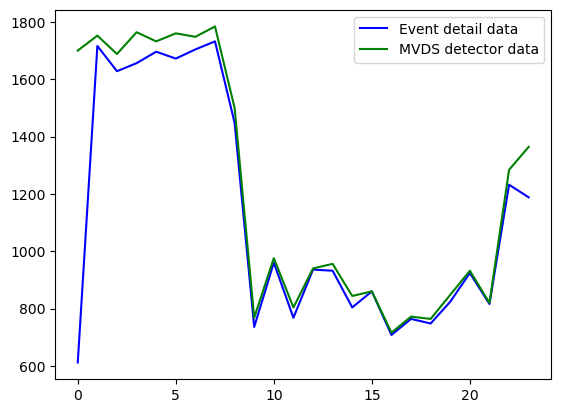

In [17]:
plt.plot(df_mvds_event_detail['Aggregate Mainline flow rate'],c='blue')
plt.plot(df_mvds_event_detail['Average Flow Rate'],c='green')
plt.legend(['Event detail data','MVDS detector data'])